
## WIP - improvements

Notable TODOs:

• Explanation of the Heap Sort algorithm.

• Python function implementing Heap Sort.

• Explanation of the computational complexity of Heap Sort.

• Explanation of how graph theory is used in Heap Sort.


# Heap Sort Algorithm


## Purpose
The purpose of this notebook is to explain and implement(using Python) the Heap Sort algorithm. Also, to explain its computational complexity and how graph theory is used in Heap Sort

## Methodology
Although an in depth knowledge of a sorting algorithems or the Python coding language is not required, it is assumed that the reader has a basic understanding of code and computational knowledge.

## What is Heap Sort?

Heap sort is a sorting algorithm based on the binary heap data structure. Sorting is a process of arranging entities in a particular order, i.e. ascending, descending, or alphabetical order. 

Data structure sorting is concerned with the arrangement of data. There are different sorting algorithms that depend on various factors like data structure, complexity, etc. One of the popular sorting algorithms that we are going to discuss here is the Heap Sort.

In order to fully understand how heap sort works, we first have to understand a **binary heap** and subsequently, a **binary tree**.



### Binary tree

A binary tree is a tree-type non-linear data structure with a maximum of two children for each parent. Every node in a binary tree has a left and right reference along with the data element. The node at the top of the hierarchy of a tree is called the root node. The nodes that hold other sub-nodes are the parent nodes.


[![Binary-Tree1.png](https://i.postimg.cc/B6YMrPz4/Binary-Tree1.png)](https://postimg.cc/tZ63PJyM)

Reference- https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm


The following are the important terms with respect to Binary trees:

- **Path** - Path refers to the sequence of nodes along the edges of a tree.
- **Root** - The node at the top of the tree is called root. There is only one root per tree and one path from the root node to any node.
- **Parent Node** − Any node except the root node has one edge upward to a node called parent.
- **Child Node** − The node below a given node connected by its edge downward is called its child node.
- **Leaf Node** − The node which does not have any child node is called the leaf node.
- **Sub-tree** − Subtree represents the descendants of a node.


### Binary heap
A binary heap is simply a complete binary tree, in which each level of the tree (except, perhaps, the last level) is completely filled and all nodes are stored starting from the left to right. 

A binary heap also takes into account how the values are stored. Either the value of the parent node is always greater than the value of its children (called a max heap), or vice versa, where the value of the parent is smaller than that of its children (called a min heap). 


<br>

# Implementation of Heap Sort
The heap sort algorithm has two main steps. Both are described in  further detail below:

1. **Build a max heap from the available data points.**
2. **Switch the root node with the last node, and remove it from the heap.** 

(Repeat these two steps until there is only one element is remaining). 


## Step 1: Build a max heap from the data.
In this example, we will be using a max heap instead of min heap. In order to create a max heap, we must compare the value of this parent node with its child. If the value of the child is greater than the parent, then swap them. This process is repeated until all parent nodes have a greater value than their children.

This video shows the process of creating a binary tree from an array of data. Then, the binary tree is sorted into a max heap. 



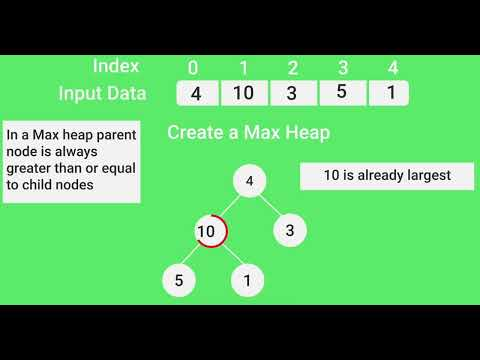

In [1]:
from IPython.display import YouTubeVideo
id='yehkKyDFIw0'
YouTubeVideo(id=id,width=800,height=500)

Reference - https://www.youtube.com/watch?v=MtQL_ll5KhQ&t=10s

# Placeholder Title
Placeholder Text

# Placeholder Title
Placeholder Text

# Placeholder Title
Placeholder Text

# Placeholder Title
Placeholder Text

# References
We report here relevant references:
1. 
2. 